# Importance of Handwashing
*We are going to look at Dr. Ignaz Semmelweis' who discovered the importance of handwashing. The data comes from [Kaggle](https://www.kaggle.com/code/arijit75/dr-semmelweis-and-the-discovery-of-handwashing/notebook).*

In [28]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

In [29]:
yearly = pd.read_csv('./data/yearly_deaths_by_clinic.csv')
yearly

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


In [30]:
monthly = pd.read_csv('./data/monthly_deaths.csv')
monthly

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2
...,...,...,...
93,1848-11-01,310,9
94,1848-12-01,373,5
95,1849-01-01,403,9
96,1849-02-01,389,12


In [31]:
tmp = dict(list(yearly.groupby('clinic')))
tmp

{'clinic 1':    year  births  deaths    clinic
 0  1841    3036     237  clinic 1
 1  1842    3287     518  clinic 1
 2  1843    3060     274  clinic 1
 3  1844    3157     260  clinic 1
 4  1845    3492     241  clinic 1
 5  1846    4010     459  clinic 1,
 'clinic 2':     year  births  deaths    clinic
 6   1841    2442      86  clinic 2
 7   1842    2659     202  clinic 2
 8   1843    2739     164  clinic 2
 9   1844    2956      68  clinic 2
 10  1845    3241      66  clinic 2
 11  1846    3754     105  clinic 2}

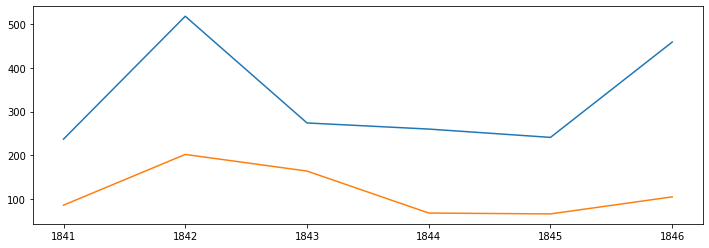

In [32]:
plt.figure(figsize=(12,4))
plt.plot(tmp['clinic 1']['year'], tmp['clinic 1']['deaths'])
plt.plot(tmp['clinic 2']['year'], tmp['clinic 2']['deaths'])

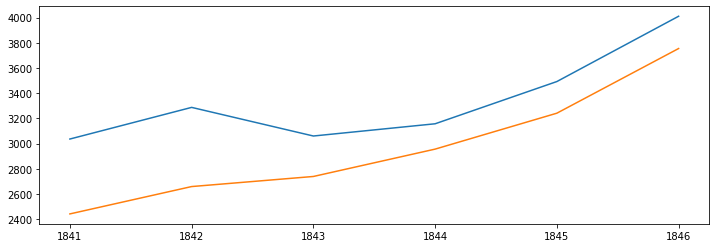

In [33]:
plt.figure(figsize=(12,4))
plt.plot(tmp['clinic 1']['year'], tmp['clinic 1']['births'])
plt.plot(tmp['clinic 2']['year'], tmp['clinic 2']['births'])

In [34]:
rates = [tmp[f'clinic {i+1}']['deaths']/tmp[f'clinic {i+1}']['births'] for i in range(2)]
rates

[0    0.078063
 1    0.157591
 2    0.089542
 3    0.082357
 4    0.069015
 5    0.114464
 dtype: float64,
 6     0.035217
 7     0.075968
 8     0.059876
 9     0.023004
 10    0.020364
 11    0.027970
 dtype: float64]

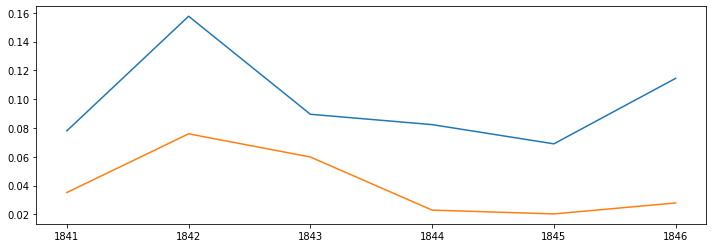

In [35]:
plt.figure(figsize=(12,4))
plt.plot(tmp['clinic 1']['year'],rates[0])
plt.plot(tmp['clinic 1']['year'],rates[1])

*We test whether there is a statistically significant difference between these numbers with the T-test. Statistical significance is another way of saying that the p-value of a statistical test is small enough to reject the null hypothesis of the test.*

In [36]:
stats.ttest_rel(rates[0],rates[1])

Ttest_relResult(statistic=6.3759924953655505, pvalue=0.0014041556191018375)

"Why is the proportion of deaths constantly so much higher in Clinic 1? Semmelweis saw the same pattern and was puzzled and distressed. The only difference between the clinics was that many medical students served at Clinic 1, while mostly midwife students served at Clinic 2. While the midwives only tended to the women giving birth, the medical students also spent time in the autopsy rooms examining corpses.

Semmelweis started to suspect that something on the corpses, spread from the hands of the medical students, caused childbed fever. So in a desperate attempt to stop the high mortality rates, he decreed: Wash your hands! This was an unorthodox and controversial request, nobody in Vienna knew about bacteria at this point in time."

In [37]:
monthly['date'] =  pd.to_datetime(monthly['date'])
monthly

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2
...,...,...,...
93,1848-11-01,310,9
94,1848-12-01,373,5
95,1849-01-01,403,9
96,1849-02-01,389,12


In [38]:
start = pd.to_datetime('1847-06-01')
before = monthly[monthly["date"] < start]
after = monthly[monthly["date"] >= start]

In [39]:
before

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2
...,...,...,...
71,1847-01-01,311,10
72,1847-02-01,312,6
73,1847-03-01,305,11
74,1847-04-01,312,57


In [40]:
after

,date,births,deaths
76,1847-06-01,268,6
77,1847-07-01,250,3
78,1847-08-01,264,5
79,1847-09-01,262,12
80,1847-10-01,278,11
81,1847-11-01,246,11
82,1847-12-01,273,8
83,1848-01-01,283,10
84,1848-02-01,291,2
85,1848-03-01,276,0


In [41]:
rates_before = before['deaths']/before['births']
rates_before 

0     0.145669
1     0.075314
2     0.043321
3     0.015686
4     0.007843
        ...   
71    0.032154
72    0.019231
73    0.036066
74    0.182692
75    0.122449
Length: 76, dtype: float64

In [42]:
rates_after = after['deaths']/after['births']
rates_after

76    0.022388
77    0.012000
78    0.018939
79    0.045802
80    0.039568
81    0.044715
82    0.029304
83    0.035336
84    0.006873
85    0.000000
86    0.006557
87    0.009585
88    0.011364
89    0.003717
90    0.000000
91    0.009615
92    0.023411
93    0.029032
94    0.013405
95    0.022333
96    0.030848
97    0.049261
dtype: float64

In [43]:
stats.ttest_ind(rates_before,rates_after)

Ttest_indResult(statistic=5.511607211341916, pvalue=2.985436556724523e-07)